# Problem Set 3

##### Serena Flint

### Problem 1

In [2]:
#Baker map example using the decimal package to increase precision of computations
import numpy as np
import matplotlib.pyplot as plt
from decimal import *

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

getcontext().prec = 30
print ("Digits of Precision: ", getcontext().prec) # number of digits of precision

d2 = Decimal(2)
d1 = Decimal(1)
dhalf = d1/d2

# baker map function returns x,y with coefficient c should be in 0<c<1/2
# this routine will not work if you pass it combinations of regular numbers and decimals, 
# you need to pass only decimals
def baker(x,y,c):
        xout = d1 + c*(x-d1)  # using decimal constants 
        yout = d1 + d2*(y-d1)
        if (y<=dhalf):
                xout=c*x
                yout=d2*y

        #print(xout,yout) # for testing
        return xout,yout
    
# return two vectors of nit iterations of the Baker map
# xi,yi is initial conditions
# c is coefficient for Baker map
def vecbaker(xi,yi,c,nit):
    xout =np.array([xi])  # create an array with initial conditions
    yout =np.array([yi])
    x=xi
    y=yi
    for i in range(nit):
        x,y  = baker(x,y,c)
        xout=np.append(xout,x)  # append to arrays
        yout=np.append(yout,y)
        
    return xout,yout  # return arrays with nit iterations in them

c=d1/Decimal(3.0)  # map parameter
x0=dhalf # initial condition
y0=Decimal(2.0).sqrt()/Decimal(2) #initial condition is irrational!
print("Initial Condition:(",x0,",",y0,")")
# irrational initial condition required for non-periodic behavior

nit=10000  # numbers of iterations for the map

xv,yv = vecbaker(x0,y0,c,nit)   # get some vectors of stuff to plot 
plt.figure(figsize=(6,6), dpi=800)
plt.title("Baker Map, $c = 1/3$")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.plot(xv,yv,'.',color = 'darkolivegreen', ms=1) # plot the iterations of the map
plt.plot(xv[0],yv[0],'o', color = 'goldenrod', ms=3); # initial condition

fac = 1.0
power = 1.0
win=1.0/fac**power
plt.xlim([0,win])
plt.ylim([0,win])



Digits of Precision:  30
Initial Condition:( 0.5 , 0.707106781186547524400844362105 )


(0, 1.0)

##### Part A
It appears that for fac = 3, any integer value of power will result in a plot similar to the original.

##### Part B
Using the original plot and taking 10,000 iterations, I noticed the largest difference when only using 7 digits of precision. At this point it was clear that the plotted points were organizing into a more recognizeable pattern and at 6 digits, there appeared to be significantly less plotted points (or they all grouped onto each other).

After zooming in by changing fac from 1 to 3, I noticed that the most recognizeable difference was also at 7 digits of precision. Increasing the number of iterations did not make any difference in this result.

##### Part C
It appears that while using the original plot, 10,000 iterations, and with 30 digits of precision, changing the y0 initial condition while holding the x0 condition while y0 is greater than 1.0 does not produce a visible plot. It also seems as if with this condition that the more nonzero decimal places at the end there are, the more plots that are pointed. This would make sense why an irrational inital condition is preferred and why an initial y0 conditions of 0.5 and 0.8 produced very very few points. 

Changing the x0 initial condition while holding the y0 condition constant appears to only change where the few green points that exist outside of the columns are plotted. This is the only change I was able to observe, using negative numbers, zero, irrationals, and very large numbers.

### Problem 2

Calculated Lyapunov Exoponent: 0.693181837341455881450185115997
Percent Error: 0.00499991668185080485299583737439 %


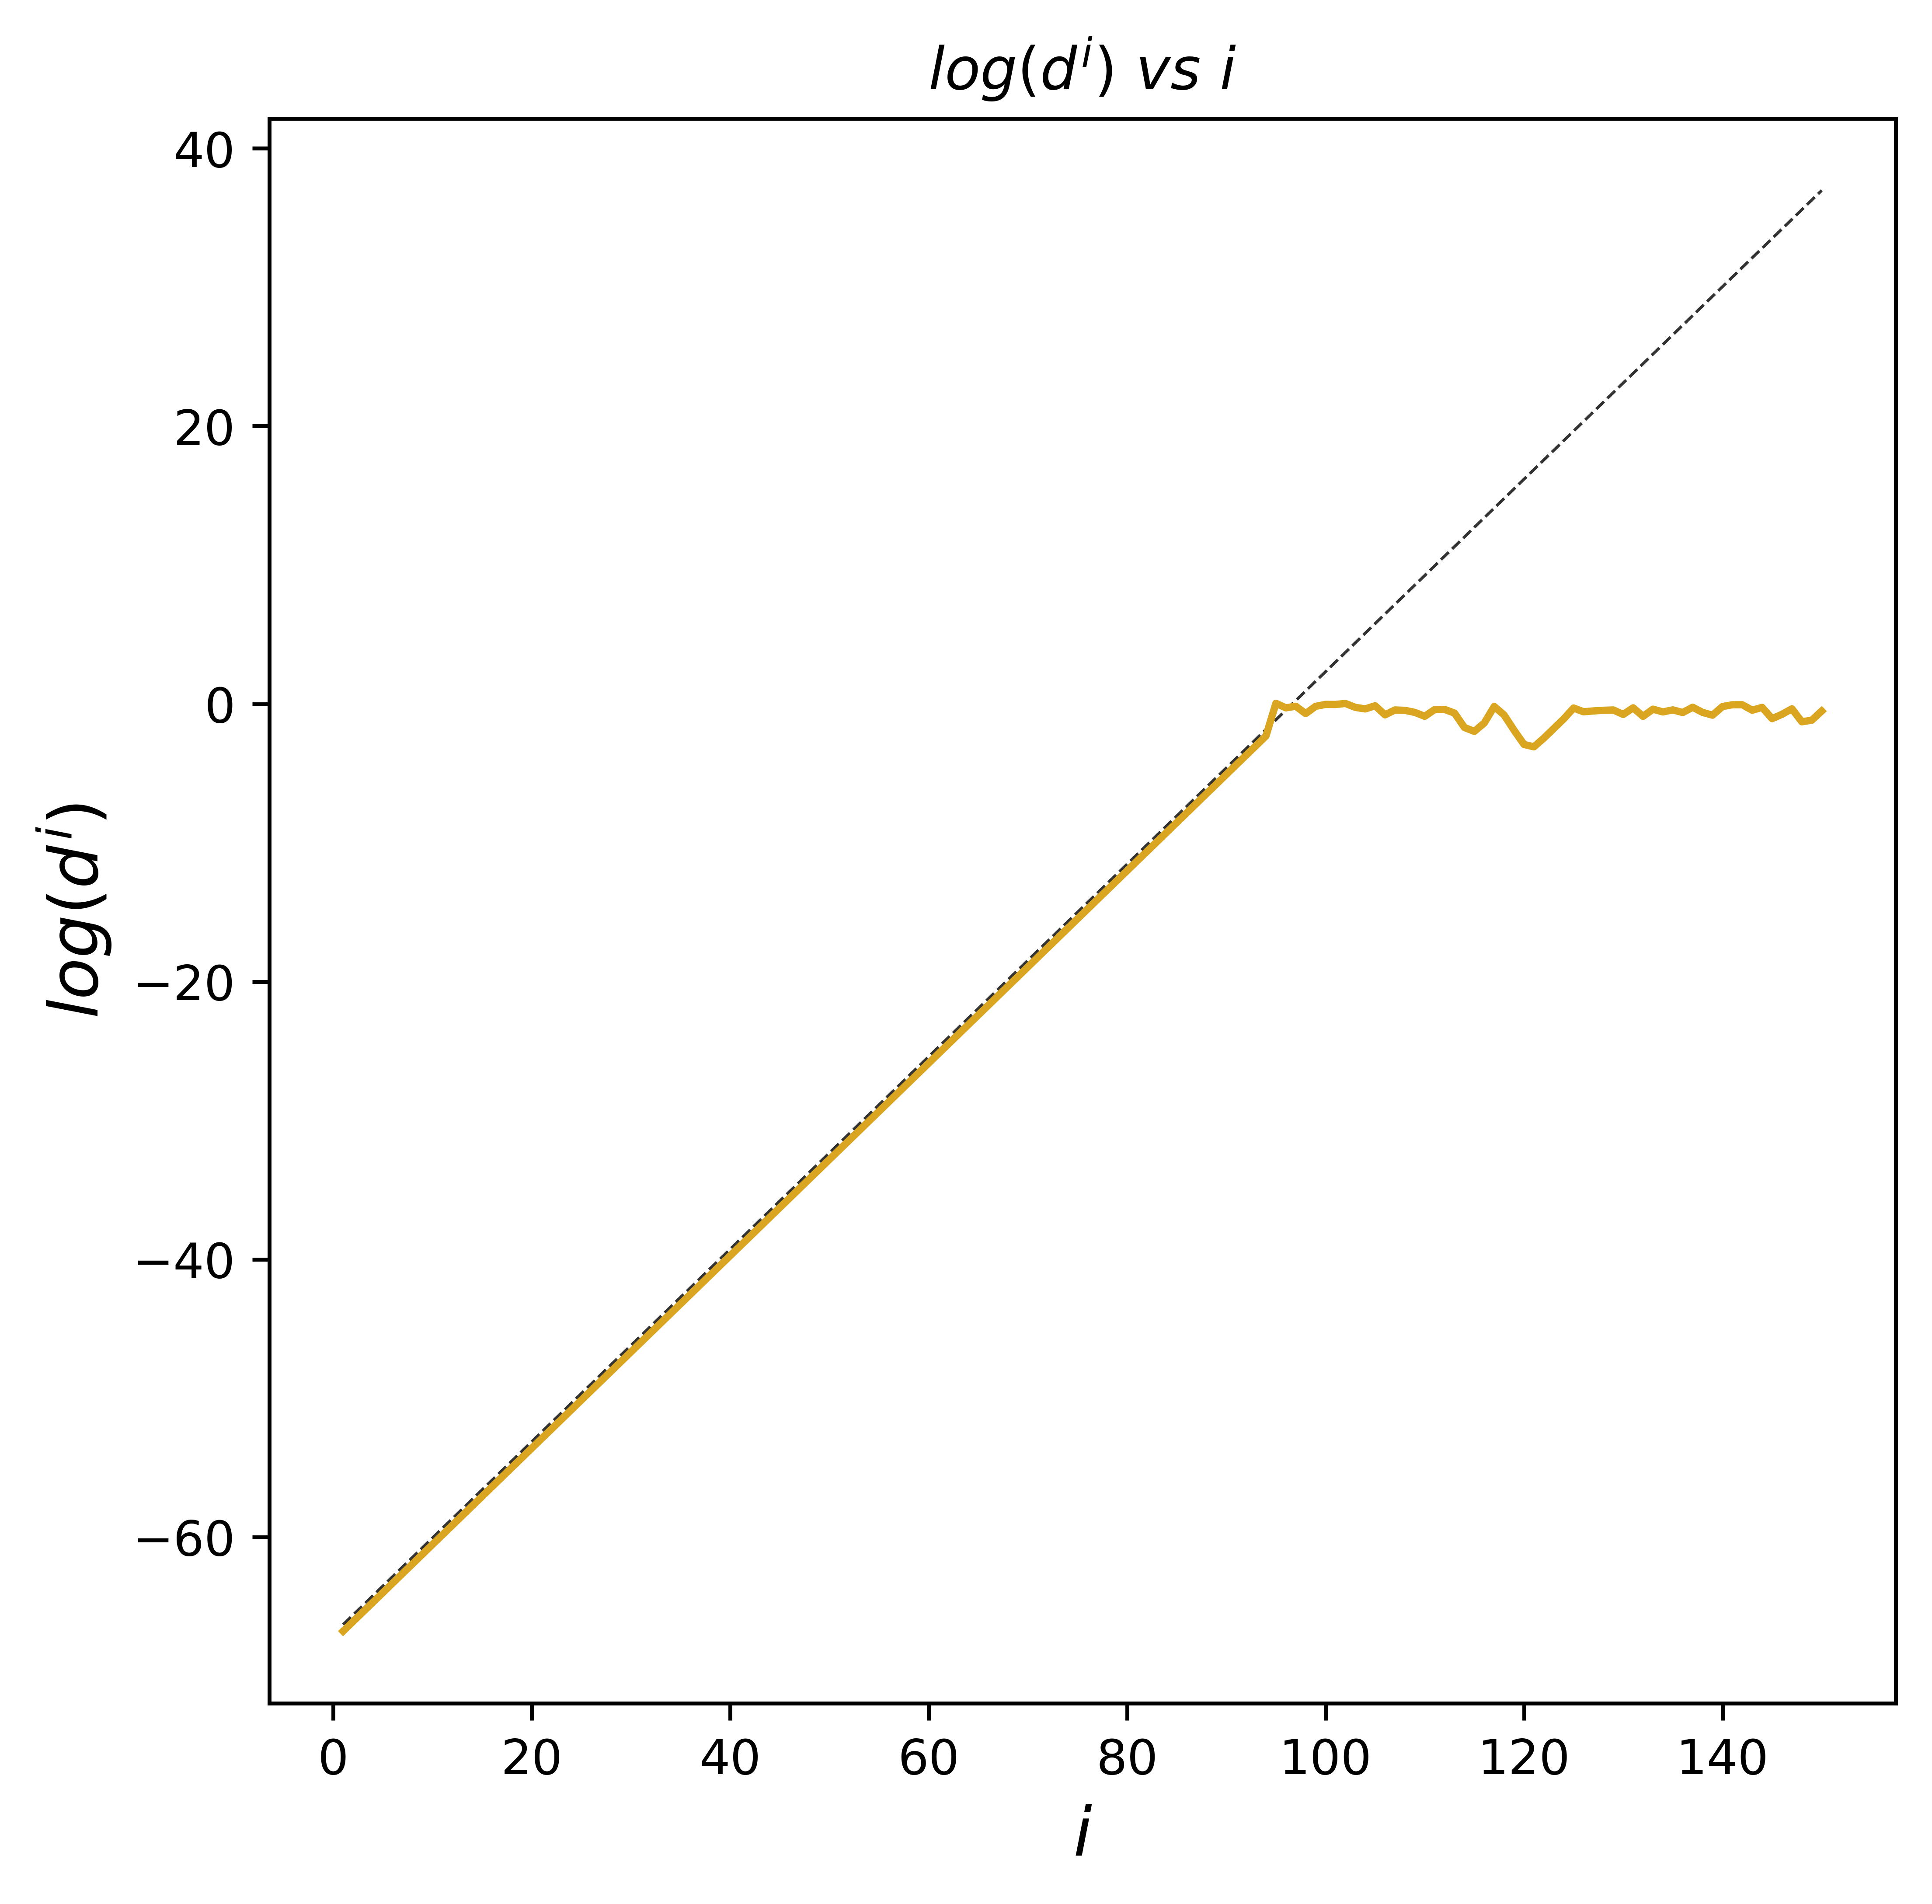

In [24]:
ep = Decimal(1e-29)
getcontext().prec = 30

e_itr = 10000
e = Decimal((1+1/e_itr)**e_itr) #manually calculates the value of e by effectively taking the limit
#print(e) #used for debugging

d2 = Decimal(2.0)  # using package decimal we need to give constants 2, 1 this way
d1 = Decimal(1.0)
dhalf = d1/d2

def baker(x,y,c):
        xout = d1 + c*(x-d1)  # using decimal constants 
        yout = d1 + d2*(y-d1)
        if (y<=dhalf):
                xout=c*x
                yout=d2*y

        #print(xout,yout) # for testing
        return xout,yout
    
def vecbaker(xi,yi,c,nit):
    xout = np.array([xi])  # create an array with initial conditions
    yout = np.array([yi])
    x=xi
    y=yi
    for i in range(nit):
        x,y  = baker(x,y,c)
        xout=np.append(xout,x)  # append to arrays
        yout=np.append(yout,y)
        
    return xout,yout  # return arrays with nit iterations in them

c=d1/Decimal(3.0) 
x0=dhalf # initial condition
y0=Decimal(2.0).sqrt()/Decimal(2) #initial condition is irrational!

def dist(x1, x2, y1, y2):
    x_diff = (x1-x2)**2
    y_diff = (y1-y2)**2
    return np.sqrt(x_diff + y_diff)

itr = 150
i = np.linspace(1,itr,itr)

x1, y1 = vecbaker(x0,y0,c,itr-1)
x2, y2 = vecbaker(x0,(y0+ep), c, itr-1)

y = np.log10(dist(x1,x2,y1,y2))/np.log10(e)

plt.figure(figsize=(6,6), dpi=400)
plt.title("$log(d^{i}) \ vs \ i$")
plt.xlabel("$i$", fontsize=14)
plt.ylabel("$log(d^{i})$", fontsize=14)
plt.plot(i, np.log(2.0)*i-67, "k--", lw = 0.6, alpha = 0.8) #line with m = ln(2)
plt.plot(i, y, color = 'goldenrod', lw = 1.5) #used change of base to get ln(dist())

m_top = y[50]-y[20]
m_bottom = Decimal(30.0)

m_exp = m_top/m_bottom

print("Calculated Lyapunov Exoponent:", m_exp)
ln_2 = Decimal(np.log(2))

error = np.abs((m_exp-ln_2)/ln_2)*100
print("Percent Error:", error,"%")


From the graph, it appears that we were able to calculate the Lyapunov Exponent to be ~0.69318, which represents a ~0.00500% error to the known value of ln(2). For more precise results, see the above code output.